In [2]:
from tp3.src.plotter import plot_bars, plot_arrays
import numpy as np
from tp3.src.optimizers import *
from tp3.src.perceptron import *
from tp3.src.trainer import TrainerConfig
from tp3.src.runner_3b import runner_3b
import matplotlib.pyplot as plt


In [ ]:
'''
    Run each optimizer with datasets for training and testing
'''
config = TrainerConfig.from_file("ejercicio3-b-config.json")

run_ids_optimizers = ['GradientDescent', 'Momentum']
optimizers = [GradientDescent(), Momentum()]
results_optimizers = []

for i in range(len(run_ids_optimizers)):
    result = runner_3b(run_ids_optimizers[i], optimizers[i], config)
    results_optimizers.append(result)

In [ ]:
'''
    Plot error through epochs by optimizer
'''
plot_arrays(
    [result["training_results"].error_history for result in results_optimizers],
    run_ids_optimizers,
    'Error through epochs with 80% of the dataset',
    'Epochs',
    'Error',    
)

In [33]:
'''
    GENERALIZATION after training
'''
optimizers_name = [result["name"] for result in results_optimizers]
network_errors = [result["evaluation_results"]["err"] for result in results_optimizers]
network_expected = results_optimizers[0]["evaluation_results"]["expected_output"]
network_output = [result["evaluation_results"]["network_output"] for result in results_optimizers]

for i, optimizer in enumerate(optimizers_name):
    for j in range(len(network_output[i])):
        output = "Par" if 0 <= network_output[i][j] <= 1 else "Impar"
        input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
        print("Using optimizer: ", optimizer, ", network thinks that ", output, "is the output and it is ", input, "value", network_output[i][j])
    print("Optimizer: ", optimizer, "Error: ", network_errors[i])


[array([-0.25768421]), array([0.01165002]), array([-0.03306343])]
[array([-0.93875375]), array([0.78874477]), array([-0.97883816])]
Using optimizer:  GradientDescent , network thinks that  Impar is the output and it is  Impar value [-0.25768421]
Using optimizer:  GradientDescent , network thinks that  Par is the output and it is  Par value [0.01165002]
Using optimizer:  GradientDescent , network thinks that  Impar is the output and it is  Impar value [-0.03306343]
Optimizer:  GradientDescent Error:  [1.23141737]
[array([-0.25768421]), array([0.01165002]), array([-0.03306343])]
[array([-0.93875375]), array([0.78874477]), array([-0.97883816])]
Using optimizer:  Momentum , network thinks that  Impar is the output and it is  Impar value [-0.93875375]
Using optimizer:  Momentum , network thinks that  Par is the output and it is  Par value [0.78874477]
Using optimizer:  Momentum , network thinks that  Impar is the output and it is  Impar value [-0.97883816]
Optimizer:  Momentum Error:  [0.02

In [ ]:
'''
    GENERALIZATION: Run each optimizer and plot the results
'''
config = TrainerConfig.from_file("ejercicio3-b-config.json")
n = 3

gradient_error = []
gradient_stdev = 0

for i in range(n):
    result = runner_3b(f"Gradient {i+1}", GradientDescent(), config)
    gradient_error.append(result["evaluation_results"]["err"])

gradient_mean = np.mean(gradient_error)
gradient_stdev = np.std(gradient_error)

momentum_error = []
momentum_stdev = 0

for i in range(n):
    result = runner_3b(f"Momentum {i+1}", Momentum(), config)
    momentum_error.append(result["evaluation_results"]["err"])

momentum_mean = np.mean(momentum_error)
momentum_stdev = np.std(momentum_error)

"""
    Generalization: Error by optimizer at the end of the training
"""

plot_bars(
    [gradient_mean, momentum_mean],
    [gradient_stdev, momentum_stdev],
    ["Gradient", "Momentum"],
    "Error at the end of the training with 50% of the dataset to test",
    "Optimizer",
    "Error",
)

In [36]:
'''
    Run each learning rate and plot the results with GradientDescent optimizer
'''
config = TrainerConfig.from_file("ejercicio3-c-config.json")

run_ids_gd_lr = ['10^-1', '10^-2', '10^-3']
learning_rates = [0.1, 0.01, 0.001]
results_gd_lr = []

for i in range(len(run_ids_gd_lr)):
    config.learning_rate = learning_rates[i]
    result = runner_3b(run_ids_gd_lr[i], Momentum(), config)
    results_gd_lr.append(result)

Run 10^-1 started
Run 10^-2 started
Run 10^-3 started


In [ ]:
'''
    plot the results with GradientDescent optimizer
'''
plot_arrays(
    [result["data"].error_history for result in results_gd_lr],
    run_ids_gd_lr,
    'Error through epochs with gradient descent using logistics',
    'Epochs',
    'Error',    
)

In [ ]:
'''
    Run each learning rate and plot the results with Momentum optimizer
'''
config = TrainerConfig.from_file("ejercicio3-c-config.json")

run_ids_momentum_lr = ['10^-1', '10^-2', '10^-3']
learning_rates = [0.1, 0.01, 0.001]
results_momentum_lr = []

for i in range(len(run_ids_momentum_lr)):
    config.learning_rate = learning_rates[i]
    result = runner_3b(run_ids_momentum_lr[i], Momentum(), config)
    results_momentum_lr.append(result)

In [ ]:
'''
    plot the results with GradientDescent optimizer
'''
plot_arrays(
    [result["data"].error_history for result in results_momentum_lr],
    run_ids_momentum_lr,
    'Error through epochs',
    'Epochs',
    'Error',    
)

In [16]:
def get_multilayer(optimizer: Optimizer, perceptrons_by_layer):
    perceptrons = []

    for p in perceptrons_by_layer:
        nl = [0] * p
        perceptrons.append(nl)

    for i in range(len(perceptrons_by_layer)):
        for j in range(perceptrons_by_layer[i]):
            if i == 0:
                perceptrons[i][j] = Perceptron(
                    initial_weights=np.random.random(len(dataset_input[0]) + 1) * 0.8
                    - 0.4,
                    theta_func=config.theta,
                )
            else:
                perceptrons[i][j] = Perceptron(
                    initial_weights=np.random.random(perceptrons_by_layer[i - 1] + 1)
                    * 0.8
                    - 0.4,
                    theta_func=config.theta,
                )
    return MultilayerPerceptron(perceptrons, optimizer)

0
th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
[Data 1] expected: [-1] got: [0.96567837] data: [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[Data 2] expected: [1] got: [0.32364988] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[Data 3] expected: [-1] got: [0.96739789] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 4] expected: [1] got: [0.82689049] data: [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[Data 5] expected: [-1] got: [0.98004898] data: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 6] expected: [1] got: [0.93415163] data: [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Da

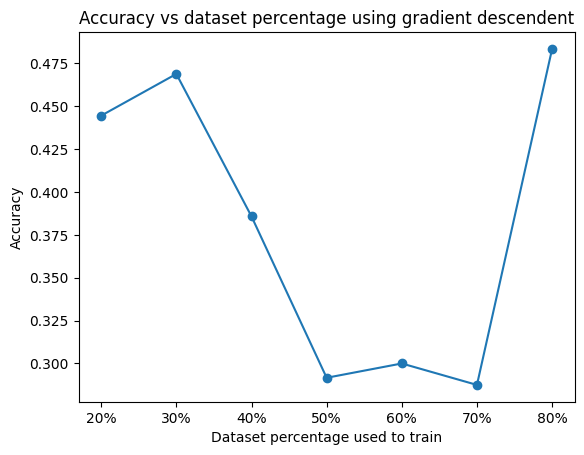

In [36]:
from tp3.src.trainer import evaluate_multilayer_perceptron, train_multilayer_perceptron

'''
    Accurancy vs dataset percentage
'''

config = TrainerConfig.from_file("ejercicio3-b-config.json")

with open("./digits.txt", "r") as file:
    # Leer cada línea del archivo y convertirla en una lista de enteros
    numbers = [[int(num) for num in line.split()] for line in file]

# Convertir la lista de listas en un vector de números
vector = [num for sublist in numbers for num in sublist]

dataset_input = [vector[i : i + 35] for i in range(0, len(vector), 35)]

dataset_outputs = [[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]]

run_ids_dataset_percentages = ['20%','30%','40%', '50%', '60%', '70%', '80%']
total_input = len(dataset_input)
results=[]
accuracy_results = []
for k in range(0, 50):
    print(k)
    print("th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN")
    accuracy_results = []
    for(i, dataset_percentage) in enumerate(run_ids_dataset_percentages):
        l = (i+1)
        ok = 0
        multilayer_perceptron_parity = get_multilayer(GradientDescent(), [35, 15, 15, 1])
        training_results = train_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[:l],
            dataset_outputs=dataset_outputs[:l],
            config=config,
        )

        evaluation_results = evaluate_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[l:],
            dataset_outputs=dataset_outputs[l:],
            error_func=config.error_func,
            print_output=True,
            acceptable_error=config.acceptable_error,
        )

        network_errors = evaluation_results["err"]
        network_expected = evaluation_results["expected_output"]
        network_output = evaluation_results["network_output"]
        for j in range(len(network_output)):
            output = "Par" if 0 <= network_output[j][0] <= 1 else "Impar"
            input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
            if output == input:
                ok += 1
            # print("Network thinks that ", output, "is the output and it is ", input, "value", network_output[j][0])
        accuracy_results.append(ok/(total_input-l))
    results.append(accuracy_results)
    print(results)

average = np.average(results, axis=0)
print(average)

plt.figure()
plt.plot(run_ids_dataset_percentages, average, '-o')
plt.xlabel('Dataset percentage used to train')
plt.ylabel('Accuracy')
plt.title('Accuracy vs dataset percentage using gradient descendent')
plt.show()

0
th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
[Data 1] expected: [-1] got: [0.89659595] data: [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[Data 2] expected: [1] got: [0.88121977] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[Data 3] expected: [-1] got: [0.94949145] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 4] expected: [1] got: [0.98258598] data: [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[Data 5] expected: [-1] got: [0.95001702] data: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 6] expected: [1] got: [0.99199503] data: [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Da

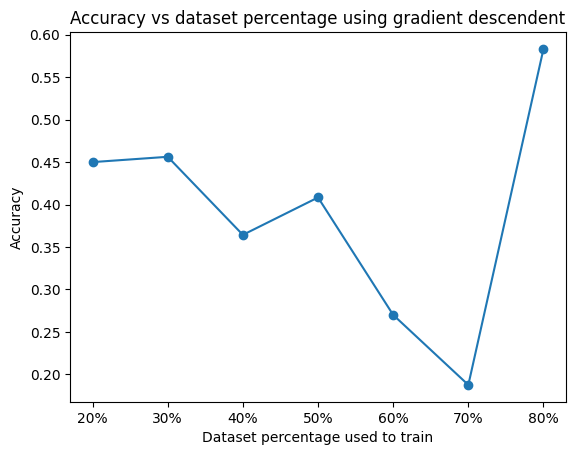

In [37]:
from tp3.src.trainer import evaluate_multilayer_perceptron, train_multilayer_perceptron

'''
    Accurancy vs dataset percentage
'''

config = TrainerConfig.from_file("ejercicio3-b-config.json")

with open("./digits.txt", "r") as file:
    # Leer cada línea del archivo y convertirla en una lista de enteros
    numbers = [[int(num) for num in line.split()] for line in file]

# Convertir la lista de listas en un vector de números
vector = [num for sublist in numbers for num in sublist]

dataset_input = [vector[i : i + 35] for i in range(0, len(vector), 35)]

dataset_outputs = [[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]]

run_ids_dataset_percentages = ['20%','30%','40%', '50%', '60%', '70%', '80%']
total_input = len(dataset_input)
results=[]
accuracy_results = []
for k in range(0, 50):
    print(k)
    print("th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN")
    accuracy_results = []
    for(i, dataset_percentage) in enumerate(run_ids_dataset_percentages):
        l = (i+1)
        ok = 0
        multilayer_perceptron_parity = get_multilayer(GradientDescent(), [35, 15, 1])
        training_results = train_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[:l],
            dataset_outputs=dataset_outputs[:l],
            config=config,
        )

        evaluation_results = evaluate_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[l:],
            dataset_outputs=dataset_outputs[l:],
            error_func=config.error_func,
            print_output=True,
            acceptable_error=config.acceptable_error,
        )

        network_errors = evaluation_results["err"]
        network_expected = evaluation_results["expected_output"]
        network_output = evaluation_results["network_output"]
        for j in range(len(network_output)):
            output = "Par" if 0 <= network_output[j][0] <= 1 else "Impar"
            input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
            if output == input:
                ok += 1
            # print("Network thinks that ", output, "is the output and it is ", input, "value", network_output[j][0])
        accuracy_results.append(ok/(total_input-l))
    results.append(accuracy_results)
    print(results)

average = np.average(results, axis=0)
print(average)

plt.figure()
plt.plot(run_ids_dataset_percentages, average, '-o')
plt.xlabel('Dataset percentage used to train')
plt.ylabel('Accuracy')
plt.title('Accuracy vs dataset percentage using gradient descendent')
plt.show()

0
th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
[Data 1] expected: [-1] got: [0.97211374] data: [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[Data 2] expected: [1] got: [0.9791443] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[Data 3] expected: [-1] got: [0.98403306] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 4] expected: [1] got: [0.91107017] data: [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[Data 5] expected: [-1] got: [0.98201871] data: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 6] expected: [1] got: [0.98150414] data: [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Dat

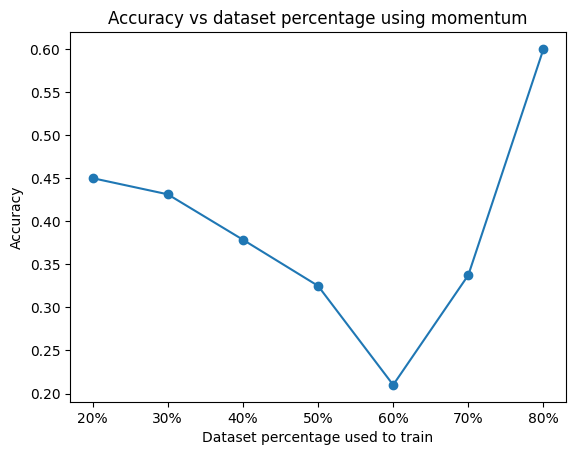

In [38]:
from tp3.src.trainer import evaluate_multilayer_perceptron, train_multilayer_perceptron

'''
    Accurancy vs dataset percentage
'''

config = TrainerConfig.from_file("ejercicio3-b-config.json")

with open("./digits.txt", "r") as file:
    # Leer cada línea del archivo y convertirla en una lista de enteros
    numbers = [[int(num) for num in line.split()] for line in file]

# Convertir la lista de listas en un vector de números
vector = [num for sublist in numbers for num in sublist]

dataset_input = [vector[i : i + 35] for i in range(0, len(vector), 35)]

dataset_outputs = [[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]]

run_ids_dataset_percentages = ['20%','30%','40%', '50%', '60%', '70%', '80%']
total_input = len(dataset_input)
results=[]
accuracy_results = []
for k in range(0, 50):
    print(k)
    print("th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN")
    accuracy_results = []
    for(i, dataset_percentage) in enumerate(run_ids_dataset_percentages):
        l = (i+1)
        ok = 0
        multilayer_perceptron_parity = get_multilayer(Momentum(), [35, 15, 15, 1])
        training_results = train_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[:l],
            dataset_outputs=dataset_outputs[:l],
            config=config,
        )

        evaluation_results = evaluate_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[l:],
            dataset_outputs=dataset_outputs[l:],
            error_func=config.error_func,
            print_output=True,
            acceptable_error=config.acceptable_error,
        )

        network_errors = evaluation_results["err"]
        network_expected = evaluation_results["expected_output"]
        network_output = evaluation_results["network_output"]
        for j in range(len(network_output)):
            output = "Par" if 0 <= network_output[j][0] <= 1 else "Impar"
            input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
            if output == input:
                ok += 1
            # print("Network thinks that ", output, "is the output and it is ", input, "value", network_output[j][0])
        accuracy_results.append(ok/(total_input-l))
    results.append(accuracy_results)
    print(results)

average = np.average(results, axis=0)
print(average)

plt.figure()
plt.plot(run_ids_dataset_percentages, average, '-o')
plt.xlabel('Dataset percentage used to train')
plt.ylabel('Accuracy')
plt.title('Accuracy vs dataset percentage using momentum')
plt.show()

0
th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
[Data 1] expected: [-1] got: [0.8209718] data: [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0]
[Data 2] expected: [1] got: [0.97824031] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
[Data 3] expected: [-1] got: [0.96431782] data: [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 4] expected: [1] got: [0.90356031] data: [0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[Data 5] expected: [-1] got: [0.9836396] data: [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data 6] expected: [1] got: [0.95538584] data: [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0]
[Data

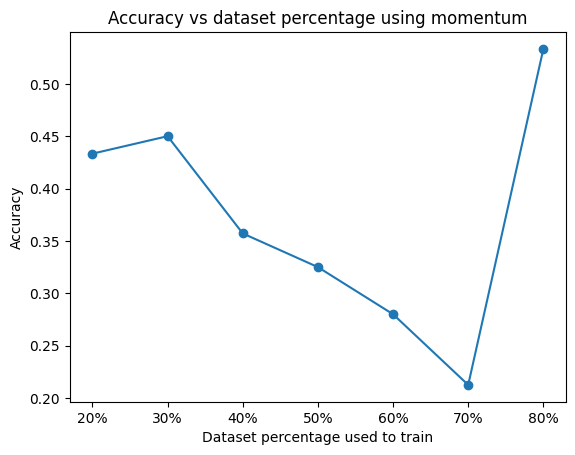

In [39]:
from tp3.src.trainer import evaluate_multilayer_perceptron, train_multilayer_perceptron

'''
    Accurancy vs dataset percentage
'''

config = TrainerConfig.from_file("ejercicio3-b-config.json")

with open("./digits.txt", "r") as file:
    # Leer cada línea del archivo y convertirla en una lista de enteros
    numbers = [[int(num) for num in line.split()] for line in file]

# Convertir la lista de listas en un vector de números
vector = [num for sublist in numbers for num in sublist]

dataset_input = [vector[i : i + 35] for i in range(0, len(vector), 35)]

dataset_outputs = [[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]]

run_ids_dataset_percentages = ['20%','30%','40%', '50%', '60%', '70%', '80%']
total_input = len(dataset_input)
results=[]
accuracy_results = []
for k in range(0, 50):
    print(k)
    print("th iterationNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN")
    accuracy_results = []
    for(i, dataset_percentage) in enumerate(run_ids_dataset_percentages):
        l = (i+1)
        ok = 0
        multilayer_perceptron_parity = get_multilayer(Momentum(), [35, 15, 1])
        training_results = train_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[:l],
            dataset_outputs=dataset_outputs[:l],
            config=config,
        )

        evaluation_results = evaluate_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_parity,
            dataset=dataset_input[l:],
            dataset_outputs=dataset_outputs[l:],
            error_func=config.error_func,
            print_output=True,
            acceptable_error=config.acceptable_error,
        )

        network_errors = evaluation_results["err"]
        network_expected = evaluation_results["expected_output"]
        network_output = evaluation_results["network_output"]
        for j in range(len(network_output)):
            output = "Par" if 0 <= network_output[j][0] <= 1 else "Impar"
            input = "Par" if 0 <= network_expected[j][0] <= 1 else "Impar"
            if output == input:
                ok += 1
            # print("Network thinks that ", output, "is the output and it is ", input, "value", network_output[j][0])
        accuracy_results.append(ok/(total_input-l))
    results.append(accuracy_results)
    print(results)

average = np.average(results, axis=0)
print(average)

plt.figure()
plt.plot(run_ids_dataset_percentages, average, '-o')
plt.xlabel('Dataset percentage used to train')
plt.ylabel('Accuracy')
plt.title('Accuracy vs dataset percentage using momentum')
plt.show()

In [9]:
import matplotlib.pyplot as plt
from src.optimizers import *
from src.perceptron import *
from src.trainer import train_multilayer_perceptron, TrainerConfig

# Input
with open('digits.txt', "r") as file:
    numbers = [[int(num) for num in line.split()] for line in file]

# Output
# dataset_outputs = []
# for i in range(10):
#     l = [-1] * 10
#     l[i] = 1
#     dataset_outputs.append(l)

# Convertir la lista de listas en un vector de números
vector = [num for sublist in numbers for num in sublist]
dataset_input = [vector[i : i + 35] for i in range(0, len(vector), 35)]
dataset_outputs = [[1], [-1], [1], [-1], [1], [-1], [1], [-1], [1], [-1]]

# Config
config = TrainerConfig.from_file("ejercicio3-b-config.json")
train_items = 10
weight_extreme = 0.4,
layers = [35, 15, 1]
methods = ["10^-1", "10^-2", "10^-3"]
num_runs = 5
average_errors = []
errors = []

for (m, method) in enumerate(methods):
    errors.append([])
    average_errors.append([])
    for k in range(num_runs):
        print("Run", k)
        perceptrons = []
        for p in layers:
            nl = [0] * p
            perceptrons.append(nl)

        for i in range(len(layers)):
            for j in range(layers[i]):
                if i == 0:
                    perceptrons[i][j] = Perceptron(
                        initial_weights=np.random.random(
                            len(dataset_input[0]) + 1) * 2 * weight_extreme - weight_extreme,
                        theta_func=config.theta
                    )
                else:
                    perceptrons[i][j] = Perceptron(
                        initial_weights=np.random.random(layers[i - 1] + 1) * 2 * weight_extreme - weight_extreme,
                        theta_func=config.theta
                    )

        multilayer_perceptron_number = MultilayerPerceptron(perceptrons, Momentum())

        config.learning_rate = 1/np.power(10, m+1)
        result_number = train_multilayer_perceptron(
            multilayer_perceptron=multilayer_perceptron_number,
            dataset=dataset_input[:train_items],
            dataset_outputs=dataset_outputs[:train_items],
            config=config
        )

        errors[-1].append(result_number.error_history)
        print(len(errors[-1]))

    average_errors[-1].append(np.array([np.mean(pos) for pos in zip(*errors[-1])]))
    print(f"Average errors: {m}")
    print(average_errors[m][0])
    print(len(average_errors[m][0]))




Run 0
1
Run 1
2
Run 2
3
Run 3
4
Run 4
5
Average errors: 0
[7.71634199e+00 6.70107217e+00 5.81384444e+00 ... 3.87489909e-05
 3.87409942e-05 3.87330008e-05]
5000
Run 0
1
Run 1
2
Run 2
3
Run 3
4
Run 4
5
Average errors: 1
[5.06614172e+00 4.84674840e+00 4.68041252e+00 ... 5.23100643e-04
 5.22980659e-04 5.22860726e-04]
5000
Run 0
1
Run 1
2
Run 2
3
Run 3
4
Run 4
5
Average errors: 2
[6.32047708 6.26385967 6.20683526 ... 0.00644107 0.00643931 0.00643756]
5000


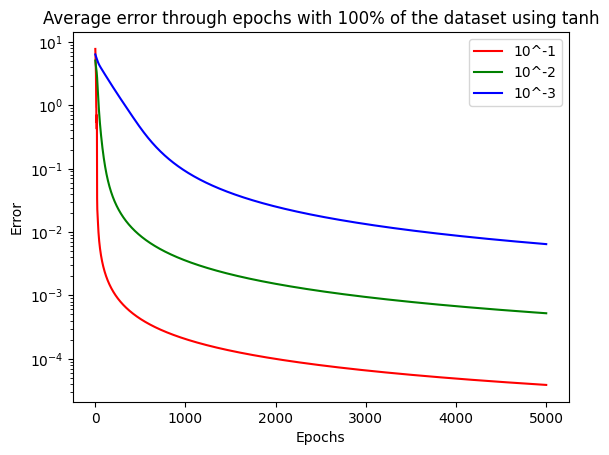

In [11]:
plt.plot(list(range(1, 5001)), average_errors[0][0], color='red', label='10^-1')
plt.plot(list(range(1, 5001)), average_errors[1][0], color='green', label='10^-2')
plt.plot(list(range(1, 5001)), average_errors[2][0], color='blue', label='10^-3')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.yscale('log')
plt.title('Average error through epochs with 100% of the dataset using tanh')

# Mostrar el gráfico
plt.show()